In [1]:
pip install opencv-python numpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2
import os

import numpy as np

In [24]:
PATH = 'C:\\Users\\boume\\Multimodal-Diagnosis-by-AI\\Data\\Data_Brain\\Train'
classes = os.listdir(PATH)
labels_data = {}
data = {}
for cls in classes :
    LABEL_PATH = PATH+'\\'+cls+'\\labels'
    labels = os.listdir(LABEL_PATH)
    i = 0
    for lbl in labels[:3] :

        contenue = ''
        with open(LABEL_PATH+'\\'+lbl) as f :
            contenue += f.read()
            split_content = contenue.split(' ')
            clean_last_word = split_content[-1].split('\n')
            print(clean_last_word)
            split_content[-1] = clean_last_word[0]
        next = {i:split_content}
        data.update(next)

        i = i+1
    labels_data[cls] = data

labels_data

['0.148438', '']
['0.132812', '']
['0.164062', '']
['0.115234', '']
['0.101562', '']
['0.177734', '']
['0.648571', '']
['0.973899', '']
['0.984797', '']
['0.050781', '']
['0.072266', '']
['0.132812', '']


{'Glioma': {0: ['3', '0.507812', '0.441406', '0.093750', '0.050781'],
  1: ['3', '0.512695', '0.381836', '0.087891', '0.072266'],
  2: ['3', '0.485352', '0.615234', '0.103516', '0.132812']},
 'Meningioma': {0: ['3', '0.507812', '0.441406', '0.093750', '0.050781'],
  1: ['3', '0.512695', '0.381836', '0.087891', '0.072266'],
  2: ['3', '0.485352', '0.615234', '0.103516', '0.132812']},
 'No Tumor': {0: ['3', '0.507812', '0.441406', '0.093750', '0.050781'],
  1: ['3', '0.512695', '0.381836', '0.087891', '0.072266'],
  2: ['3', '0.485352', '0.615234', '0.103516', '0.132812']},
 'Pituitary': {0: ['3', '0.507812', '0.441406', '0.093750', '0.050781'],
  1: ['3', '0.512695', '0.381836', '0.087891', '0.072266'],
  2: ['3', '0.485352', '0.615234', '0.103516', '0.132812']}}

Glioma 



512 512
259.999744 225.999872 48.0 25.999872
235 212 283 238


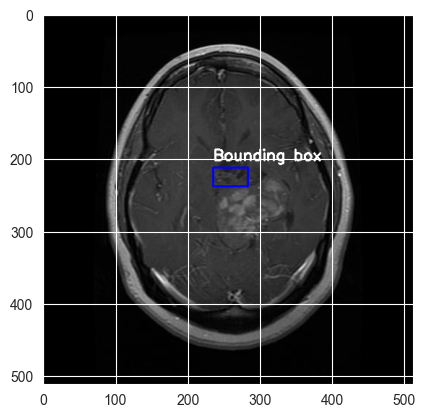

512 512
262.49984 195.500032 45.000192 37.000192
239 176 284 214


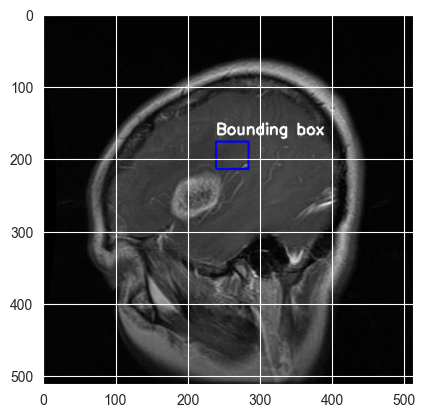

512 512
248.500224 314.999808 53.000192 67.999744
222 280 275 348


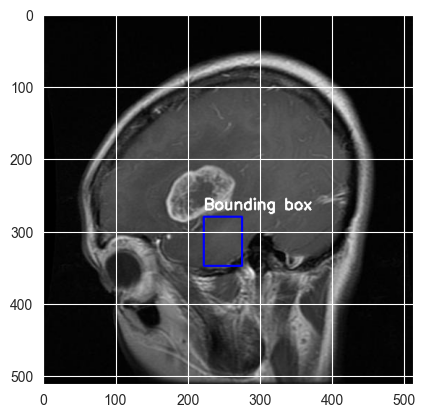

---------------------------------------------
Meningioma 



512 512
259.999744 225.999872 48.0 25.999872
235 212 283 238


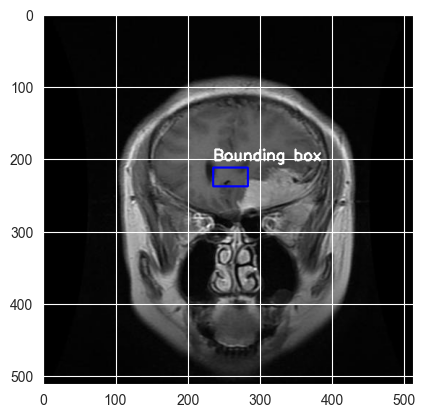

512 512
262.49984 195.500032 45.000192 37.000192
239 176 284 214


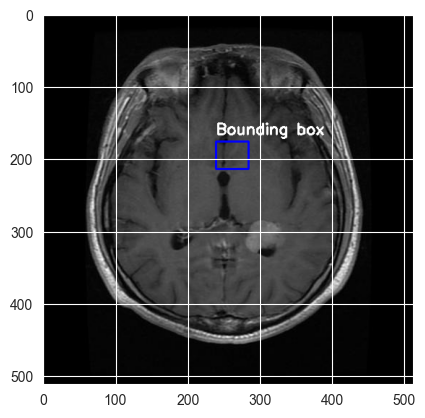

512 512
248.500224 314.999808 53.000192 67.999744
222 280 275 348


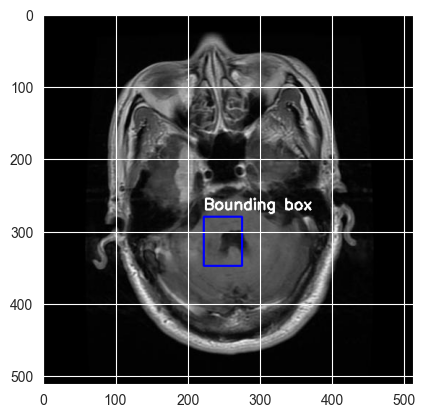

---------------------------------------------
No Tumor 



350 350
177.73420000000002 154.4921 32.8125 17.77335
161 145 194 163


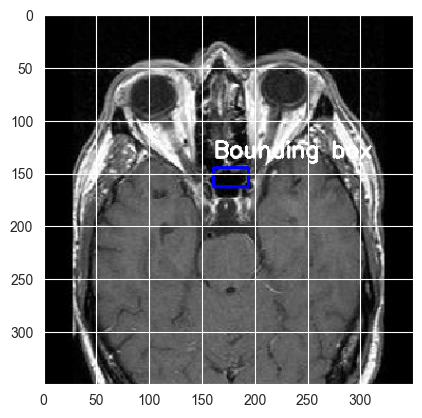

613 605
314.282035 231.01078 53.877182999999995 43.720929999999996
287 209 341 252


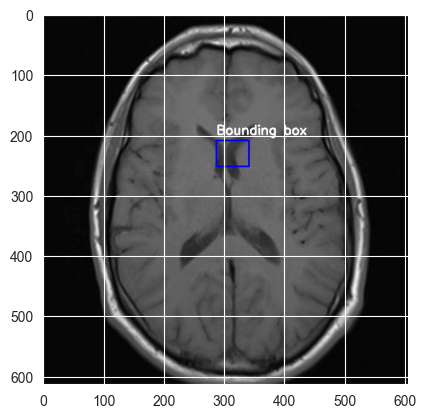

592 562
287.328384 345.761508 61.281472 74.64034400000001
256 308 317 383


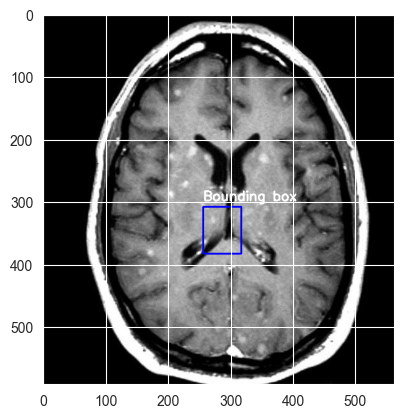

---------------------------------------------
Pituitary 



512 512
259.999744 225.999872 48.0 25.999872
235 212 283 238


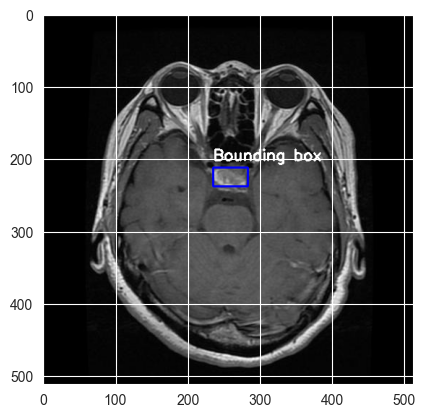

512 512
262.49984 195.500032 45.000192 37.000192
239 176 284 214


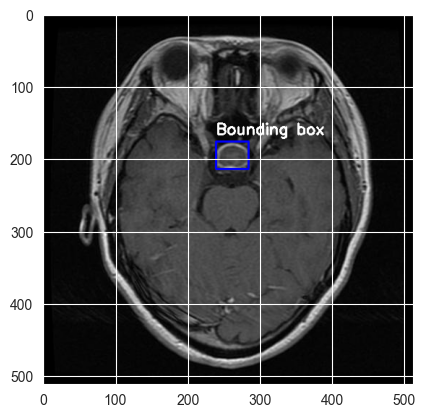

512 512
248.500224 314.999808 53.000192 67.999744
222 280 275 348


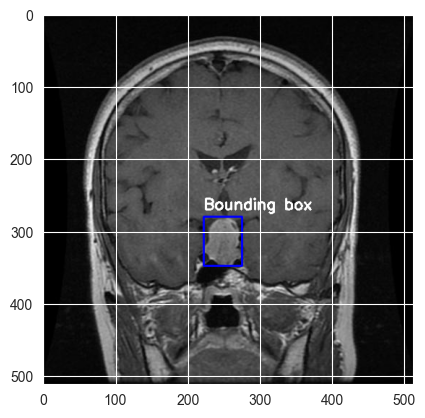

---------------------------------------------


In [79]:
from PIL import Image
import matplotlib.pyplot as plt

color = (0, 0, 255)
thickness = 2

for key , value in labels_data.items():
    i = 0
    IMAGES_PATH = PATH+'\\'+key+'\\images'
    images = []
    print(key,"\n\n\n")
    for filename in os.listdir(IMAGES_PATH):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(IMAGES_PATH, filename)
            img = Image.open(image_path)
            images.append(img)
    for key_s , value_s in value.items() :
        current_image_pil = images[i]
        W, H = current_image_pil.size
        x_center, y_center, box_width, box_height = value_s[1:]
        image = np.array(images[i])
        image_width , image_height = image.shape[:2]
        print(image_width,image_height)


        x_center = float(x_center)
        y_center = float(y_center)
        box_width = float(box_width)
        box_height = float(box_height)

        x_center *= image_width

        y_center*= image_height

        box_width *= image_width

        box_height *= image_height
        print(x_center, y_center, box_width, box_height )

        x_min = int(x_center - box_width/2)
        y_min = int(y_center - box_height/2)
        x_max = int(x_center + box_width/2)
        y_max = int(y_center + box_height/2)
        print(x_min, y_min, x_max, y_max )


        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        label = "Bounding box"
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x_min
        text_y = y_min - 10 if y_min - 10 > 10 else y_min + text_size[1] + 10
        cv2.putText(image, label, (text_x, text_y),
            font, font_scale, (255, 255, 255), font_thickness)
        plt.imshow(image)
        plt.show()
        i = i+1
    print("---------------------------------------------")
